In [1]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymongo

In [2]:
result = pd.read_csv('ltc_v1.0_Data_7_25_5.csv',sep=',')
result.count()

id                      418
collcetion_latest_id    418
base_topic              418
dst                     418
src                     418
seq                     418
SNR                     418
RSSIpkt                 418
BW                      418
CR                      418
SF                      418
sensor_id               418
version                 418
command_id              418
data_length             418
data                    418
mote_lon                418
mote_lat                418
time                    418
distance2base           418
dtype: int64

In [4]:
addressA_1=result[result['id']>327]
addressA=addressA_1[addressA_1['id']<410]
addressA.count()

id                      82
collcetion_latest_id    82
base_topic              82
dst                     82
src                     82
seq                     82
SNR                     82
RSSIpkt                 82
BW                      82
CR                      82
SF                      82
sensor_id               82
version                 82
command_id              82
data_length             82
data                    82
mote_lon                82
mote_lat                82
time                    82
distance2base           82
dtype: int64

In [5]:
addressA = addressA[['id','src','SNR','RSSIpkt']]

In [6]:
addressA

,id,src,SNR,RSSIpkt
327,328,2,8,-90
328,329,2,8,-94
329,330,2,8,-93
330,331,2,8,-95
331,332,2,8,-93
332,333,2,9,-92
333,334,2,8,-93
334,335,2,7,-98
335,336,2,8,-98
336,337,2,7,-94


In [8]:
addressA_2 = addressA[addressA['src']==2]

In [10]:
addressA_3= addressA[addressA['src']==3]

In [11]:
addressA_4 = addressA[addressA['src']==4]

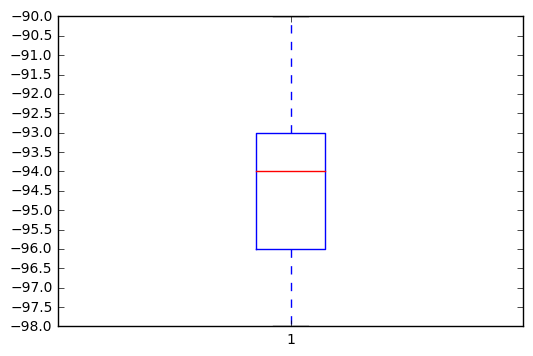

In [14]:
snr2 =[]
for i in addressA_2['RSSIpkt']:
    snr2.append(i)
snr2
plt.boxplot(snr2)
ax=plt.gca()
ax.locator_params('x',nbins=10)
ax.locator_params('y',nbins=20)

In [30]:
fig = plt.figure()

In [31]:
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
# ax1.axis([-40,-0])
# ax2.axis([-40,-60])
# ax3.axis([-40,-60])

In [32]:
snr2 =[]
for i in addressA_2['RSSIpkt']:
    snr2.append(i)
snr2
ax1.boxplot(snr2)
snr3 =[]
for i in addressA_3['RSSIpkt']:
    snr3.append(i)
snr3
ax2.boxplot(snr3)
snr4 =[]
for i in addressA_4['RSSIpkt']:
    snr4.append(i)
snr4
ax3.boxplot(snr4)
# ax=plt.gca()
# ax.locator_params('x',nbins=10)
# ax.locator_params('y',nbins=20)

{'boxes': [<matplotlib.lines.Line2D at 0xa4afff0>],
 'caps': [<matplotlib.lines.Line2D at 0xa4b5b70>,
 'fliers': [<matplotlib.lines.Line2D at 0xa4b99d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xa4b98f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xa4b5170>,
  <matplotlib.lines.Line2D at 0xa4b56b0>]}

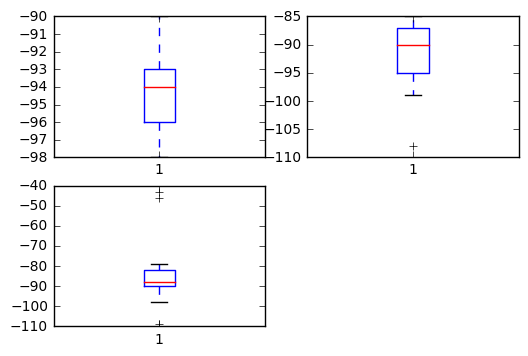

In [33]:
fig

In [37]:
addressA_3['RSSIpkt'].describe().astype(np.int64)

count     25
mean     -91
std        5
min     -108
25%      -95
50%      -90
75%      -87
max      -85
Name: RSSIpkt, dtype: int64

In [38]:
addressA_4['RSSIpkt'].describe().astype(np.int64)

count     29
mean     -85
std       12
min     -109
25%      -90
50%      -88
75%      -82
max      -43
Name: RSSIpkt, dtype: int64

In [43]:
addressA_3['RSSIpkt']

355    -86
356    -91
357    -87
358    -86
359    -89
360    -90
361    -87
362    -88
363    -86
364    -92
365    -86
366    -96
367    -99
368   -108
369    -97
370    -95
371    -90
372    -88
373    -90
374    -95
375    -90
376    -85
377    -97
378    -88
379    -94
Name: RSSIpkt, dtype: int64

In [52]:
dataA_3 =addressA_3['RSSIpkt'].replace([-108],addressA_3['RSSIpkt'].max())

In [54]:
dataA_3.describe().astype(np.int64)

count    25
mean    -90
std       4
min     -99
25%     -94
50%     -90
75%     -87
max     -85
Name: RSSIpkt, dtype: int64

In [55]:
dataA_4 = addressA_4['RSSIpkt'].replace([-43],addressA_4['RSSIpkt'].min())
dataA_4.describe().astype(np.int64)

count     29
mean     -87
std       10
min     -109
25%      -90
50%      -88
75%      -84
max      -46
Name: RSSIpkt, dtype: int64

In [57]:
dataA_4_1 =dataA_4.replace([-46],dataA_4.min())
dataA_4_1.describe().astype(np.int64)

count     29
mean     -89
std        8
min     -109
25%      -92
50%      -88
75%      -85
max      -79
Name: RSSIpkt, dtype: int64

In [61]:
dataA_4_2 =dataA_4_1.replace([-109],dataA_4_1.max())
dataA_4_2.describe().astype(np.int64)

count    29
mean    -86
std       5
min     -98
25%     -90
50%     -87
75%     -81
max     -79
Name: RSSIpkt, dtype: int64

In [62]:
dataA_4_3 =dataA_4_2.replace([-98],dataA_4_2.max())
dataA_4_3.describe().astype(np.int64)

count    29
mean    -85
std       4
min     -96
25%     -89
50%     -87
75%     -81
max     -79
Name: RSSIpkt, dtype: int64

In [63]:
dataA_4_3

380   -90
381   -93
382   -96
383   -79
384   -92
385   -88
386   -87
387   -87
388   -87
389   -88
390   -89
391   -88
392   -88
393   -89
394   -79
395   -79
396   -79
397   -81
398   -80
399   -81
400   -82
401   -81
402   -85
403   -90
404   -87
405   -84
406   -79
407   -92
408   -90
Name: RSSIpkt, dtype: int64

In [64]:
dataA_3

355   -86
356   -91
357   -87
358   -86
359   -89
360   -90
361   -87
362   -88
363   -86
364   -92
365   -86
366   -96
367   -99
368   -85
369   -97
370   -95
371   -90
372   -88
373   -90
374   -95
375   -90
376   -85
377   -97
378   -88
379   -94
Name: RSSIpkt, dtype: int64

In [65]:
fig = plt.figure()

In [66]:
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

In [67]:
nr2 =[]
for i in addressA_2['RSSIpkt']:
    snr2.append(i)
snr2
ax1.boxplot(snr2)
snr3 =[]
for i in dataA_3:
    snr3.append(i)
snr3
ax2.boxplot(snr3)
snr4 =[]
for i in dataA_4_3:
    snr4.append(i)
snr4
ax3.boxplot(snr4)

{'boxes': [<matplotlib.lines.Line2D at 0x5b1e330>],
 'caps': [<matplotlib.lines.Line2D at 0x5b1ebb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x5c06f50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x5c06e70>],
 'whiskers': [<matplotlib.lines.Line2D at 0x5b1ef50>,
  <matplotlib.lines.Line2D at 0x5b1e3d0>]}

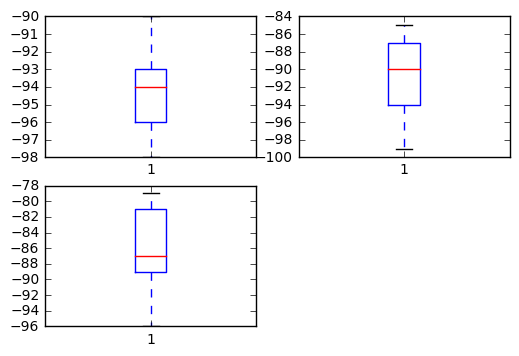

In [68]:
fig